In [36]:
%matplotlib inline
from IPython.display import clear_output
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import time

from sklearn.datasets import make_blobs, make_moons
from google.colab import files

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Part 2. Classification


Predict breast cancer based on features. 

### Data investigation

- Analyse distribution of features and target variables. Have a look on statistics. As visualization. For continuous features you can use histograms and box plots, for categorical bar charts.
- Investigate outliers. 
- Analyze correlations between features and target.

In [29]:
df = pd.read_csv("cancer-classification.csv")
df = df.drop(columns=["Unnamed: 0", "Id"])

In [30]:
df

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
593,3,1,1,1,2,1,2,1,2,2
594,3,1,1,1,3,2,1,1,1,2
595,2,1,1,1,2,1,1,1,1,2
596,5,10,10,3,7,3,8,10,2,4


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8b73a4aa90>,
      dtype=object)

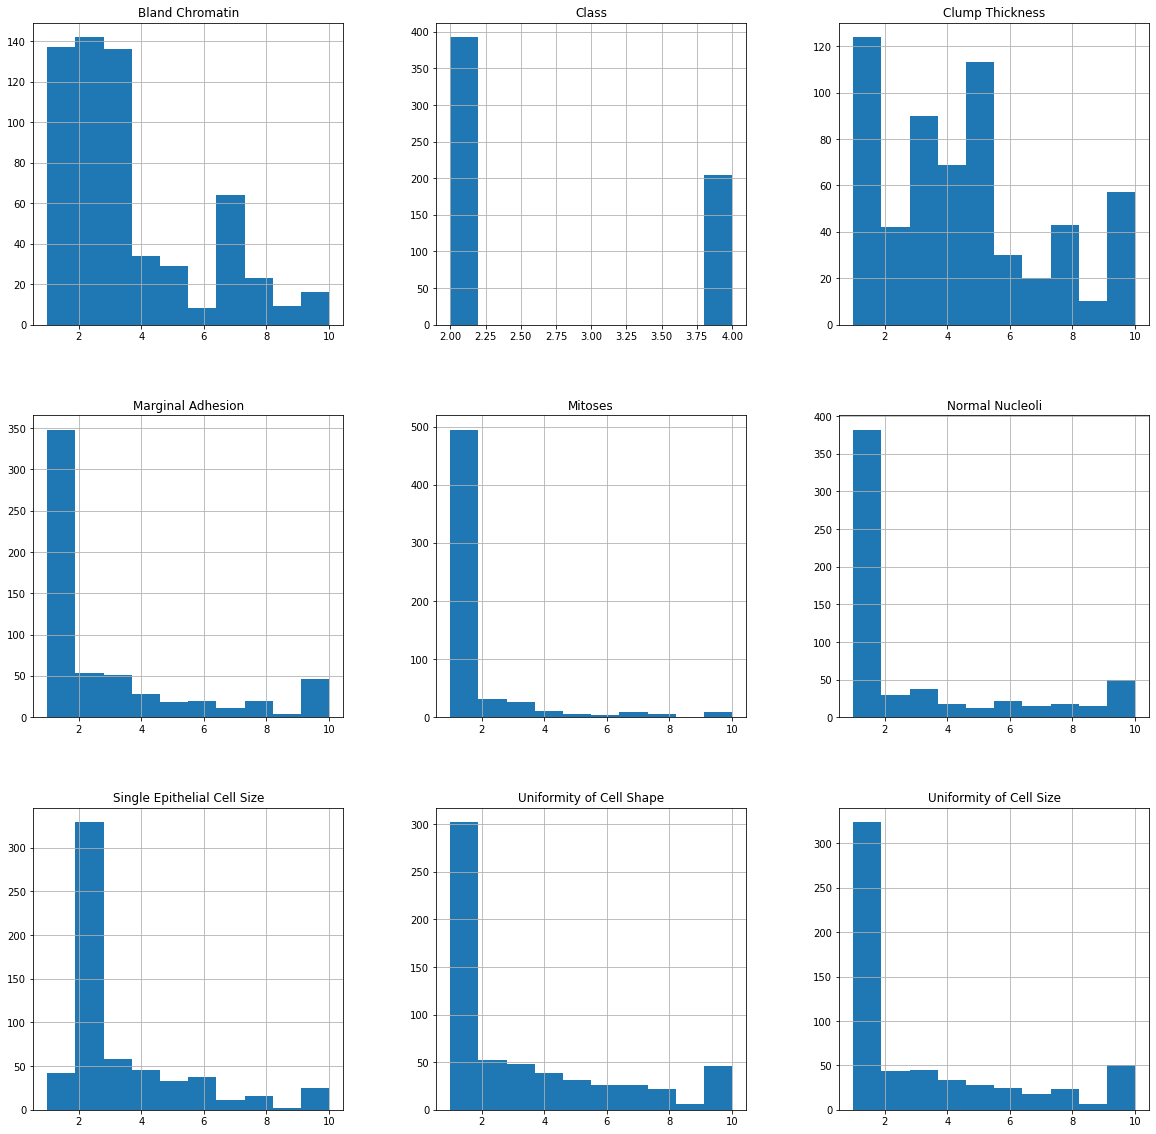

In [31]:

df.hist(figsize=(20, 20))

In [46]:
df.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000
mean,4.419732,3.088629,3.158863,2.769231,3.200669,3.396321,2.832776,1.560201,2.685619
std,2.797357,2.975135,2.916455,2.823138,2.187187,2.429947,3.028419,1.621326,0.950092
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,3.000000,4.000000,4.000000,3.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [59]:
df.dtypes
df = df.drop(columns={"Bare Nuclei"})

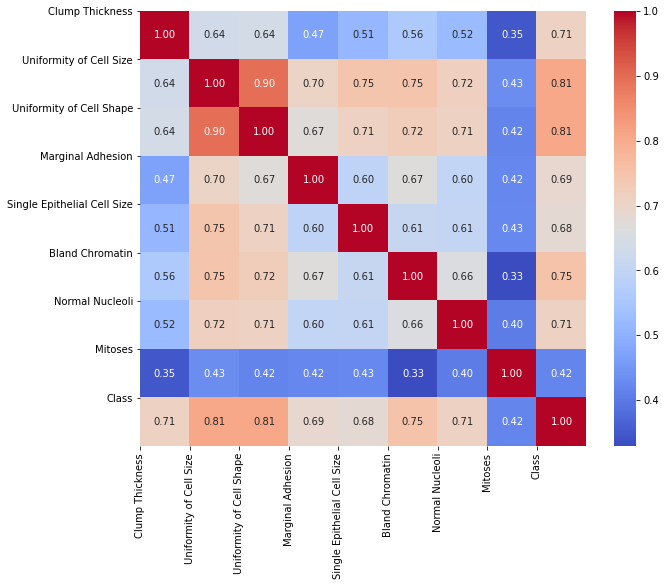

In [60]:
corr = df.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 8))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

### Data preprocessing
- Convert non-numerical features to dummy variables. 
- Scale features or target if necessary.
- Split dataset into train, test and cross validation sets.

In [64]:
# Splitting the dataset into the Training set and Test set
X = df.drop(['Class', 'Uniformity of Cell Shape'], axis = 1).values
y = df['Class'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

### Training
- Train logistic regression, evaluate on validation set, play with hyper parameters.


In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score
from copy import deepcopy
X_train1, X_test1, y_train1, y_test1 = deepcopy(X_train), deepcopy(X_test), deepcopy(y_train), deepcopy(y_test)

clf1 = LogisticRegression().fit(X_train1, y_train1)
y_pred_LR = clf1.predict(X_test1)

print(f"precision_score:\t{precision_score(y_test1, y_pred_LR, average='macro')}")
print(f"recall_score:\t\t{recall_score(y_test1, y_pred_LR, average='macro')}")
print(f"f1_score:\t\t{f1_score(y_test1, y_pred_LR, average='macro')}")



precision_score:	0.9412698412698413
recall_score:		0.947041166380789
f1_score:		0.9440864795782522


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


- Train SVM, evaluate on validation set, play with hyper parameters.

In [84]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X_train1, X_test1, y_train1, y_test1 = deepcopy(X_train), deepcopy(X_test), deepcopy(y_train), deepcopy(y_test)

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_test1, y_test1)
y_pred_LR = clf.predict(X_test1)

print(f"precision_score:\t{precision_score(y_test1, y_pred_LR, average='macro')}")
print(f"recall_score:\t\t{recall_score(y_test1, y_pred_LR, average='macro')}")
print(f"f1_score:\t\t{f1_score(y_test1, y_pred_LR, average='macro')}")


precision_score:	0.9730158730158731
recall_score:		0.9792024013722127
f1_score:		0.9760370626763939


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


- Train Gradient Boosting Classifier, evaluate on validation set, play with hyper parameters.

In [76]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = deepcopy(X_train), deepcopy(X_test), deepcopy(y_train), deepcopy(y_test)

clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train1, y_train1)
y_pred_LR = clf.predict(X_test1)

print(f"precision_score:\t{precision_score(y_test1, y_pred_LR, average='macro')}")
print(f"recall_score:\t\t{recall_score(y_test1, y_pred_LR, average='macro')}")
print(f"f1_score:\t\t{f1_score(y_test1, y_pred_LR, average='macro')}")


precision_score:	0.9469063545150501
recall_score:		0.9584048027444254
f1_score:		0.9523809523809523


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


- Check precision, recall, F1-score metrics, what is more important for you? 

- Chose best model based on validation and test set.

In [ ]:
the best model is SVM

- Write which experiments give you the best results. 

The experiment with SVM gives us the best result :-)and Logistic regression the worst one